# Proyecto Final
# Faragó Facundo - Doctorovich Gustavo
# Uiversidad Nacional del Sur

# Importar librerias y dataset

In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
import WholeBrain.Observables.FC as FC
import WholeBrain.Observables.swFCD as swFCD
import WholeBrain.Observables.phFCD as phFCD
import WholeBrain.Observables.GBC as GBC
import os
from Tests.Deco2018.setup import *

# Cargar datos
matriz_ts, matriz_conectividad_promedio,  numSampleSubjects = init()

# Inicializa una matriz para almacenar el promedio
promedio_matriz_ts = None

# Itera sobre las claves del diccionario
for key in matriz_ts.keys():
    matriz_actual = matriz_ts[key]
    # Si es la primera matriz, inicializa la matriz promedio
    if promedio_matriz_ts is None:
        promedio_matriz_ts = np.array(matriz_actual)
    else:
        # Sume la matriz actual a la matriz promedio
        promedio_matriz_ts += np.array(matriz_actual)

# Calcula el promedio dividiendo por el número de matrices
promedio_matriz_ts /= len(matriz_ts)

Going to use a matrix distance measure...
Going to use Functional Connectivity (FC)...
Going to use Sliding Windows Functional Connectivity Dynamics (swFCD)...
Going to use Phase-Interaction Matrix...
Going to use Phase Functional Connectivity Dynamics (phFCD)...
Going to use Global Brain Connectivity (GBC)...
Going to use the Euler-Maruyama Integrator...
Going to use Stephan2008 BOLD model...
Going to use the Balanced J9 (FIC) mechanism...
----------- Processing: EMOTION --------------
Loading Datos/Datasets/DataHCP80/hcp1003_EMOTION_LR_dbs80.mat
reading subject 0
reading subject 1
reading subject 2
reading subject 3
reading subject 4
reading subject 5
reading subject 6
reading subject 7
reading subject 8
reading subject 9
reading subject 10
reading subject 11
reading subject 12
reading subject 13
reading subject 14
reading subject 15
reading subject 16
reading subject 17
reading subject 18
reading subject 19
reading subject 20
reading subject 21
reading subject 22
reading subject 23


# Datos

## Matriz promedio de matrices de conectividad

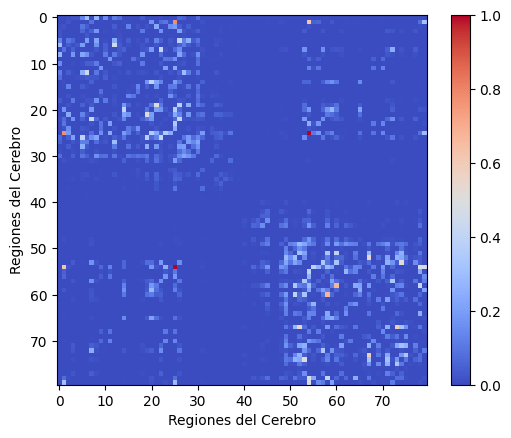

In [4]:
# Visualizar la matriz de conectividad promedio
plt.imshow(matriz_conectividad_promedio, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
#plt.title('Matriz de Conectividad Promedio de Todos los Sujetos')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

## fRMI

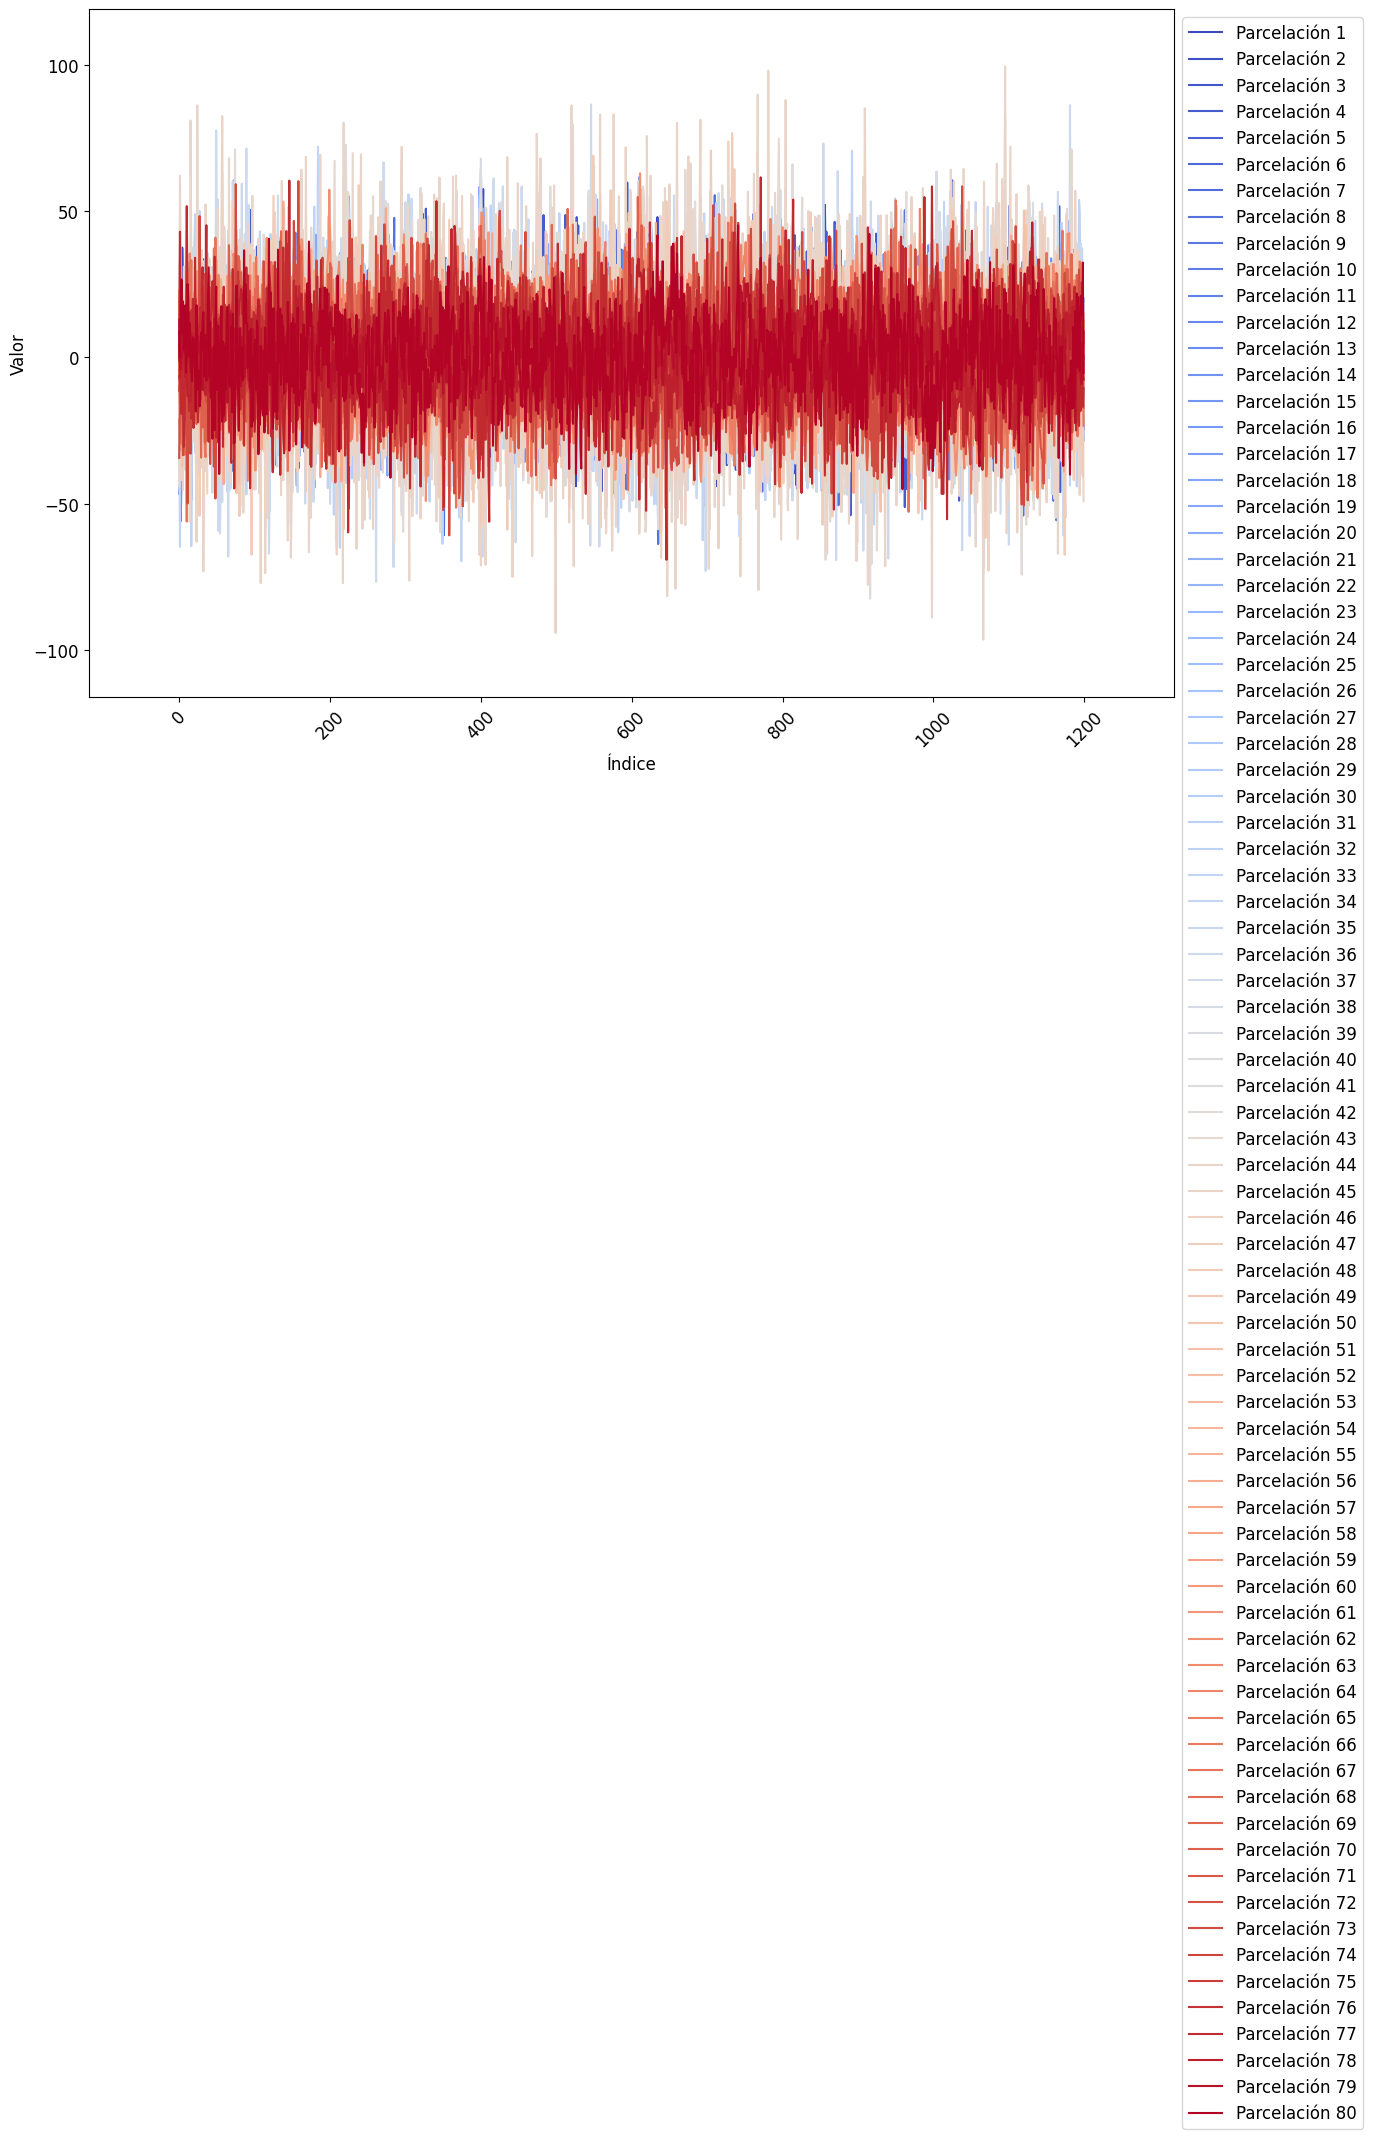

In [16]:
# Calcular el promedio de cada columna
promedios = np.mean(promedio_matriz_ts.T, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = promedio_matriz_ts.T - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

# Crear un gráfico con un tamaño más grande
plt.figure(figsize=(12, 8))

# Obtener el número de columnas y generar colores únicos para cada una de las regiones
num_columnas = matrizrp_detrended.shape[1]
colores = plt.cm.coolwarm(np.linspace(0, 1, num_columnas))

# Iterar sobre cada columna de la matriz y graficarla como una curva con un color distinto cada región
for i in range(num_columnas):
    plt.plot(matrizrp_detrended[:, i], color=colores[i], label=f'Parcelación {i+1}')

# Agregar etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')

# Ajustar el tamaño de la fuente
plt.rcParams['font.size'] = 12

# Rotar las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=45)

# Mejorar la disposición del gráfico
plt.tight_layout()

# Ajustar la posición de la leyenda fuera del área del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar los márgenes del gráfico
plt.margins(x=0.1, y=0.1)

# Mostrar el gráfico
plt.show()

## Correlacion (fMRI)

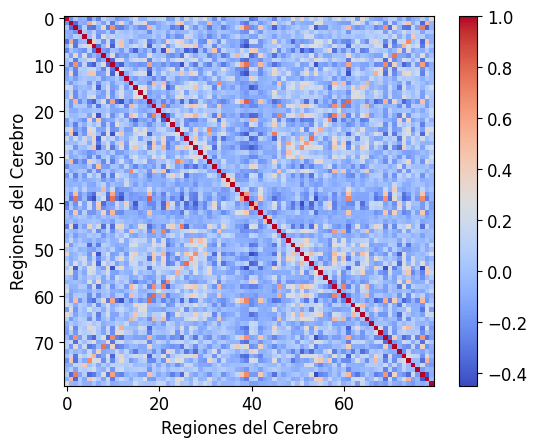

In [5]:
# Calcular el promedio de cada columna
promedios = np.mean(promedio_matriz_ts.T, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = promedio_matriz_ts.T - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

matriz_correlacion = np.corrcoef(matrizrp_detrended, rowvar=False)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
#plt.title('Matriz de Correlación')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')


# Mostrar la visualización
plt.show()


# Observables

## Functional Connectivity

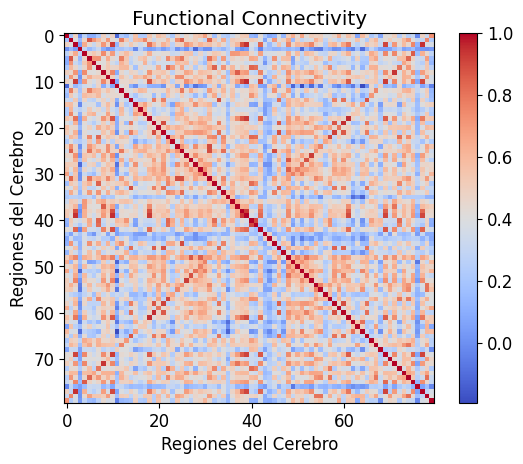

In [6]:
FC_mt = FC.from_fMRI(promedio_matriz_ts, True, True)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(FC_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Functional Connectivity')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

## Sliding Window FCD


In [7]:
sw_FCD = swFCD.from_fMRI(promedio_matriz_ts,True,True)
sw_FCD_mt = swFCD.buildFullMatrix(sw_FCD)  

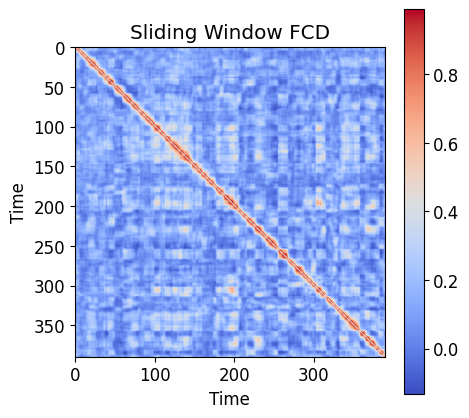

In [8]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(sw_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Sliding Window FCD')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show() 

## Phase Interaction Matrix

In [9]:
ph_FCD = phFCD.from_fMRI(promedio_matriz_ts,True,True)
ph_FCD_mt = phFCD.buildFullMatrix(ph_FCD)             

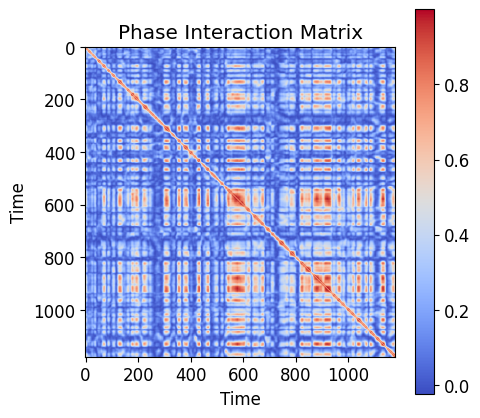

In [10]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(ph_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Phase Interaction Matrix')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show()   

## Global Brain Connectivity

In [11]:
FCD_mt = GBC.from_fMRI(promedio_matriz_ts,True,True)
GBC_mt = GBC.postprocess(FCD_mt) 

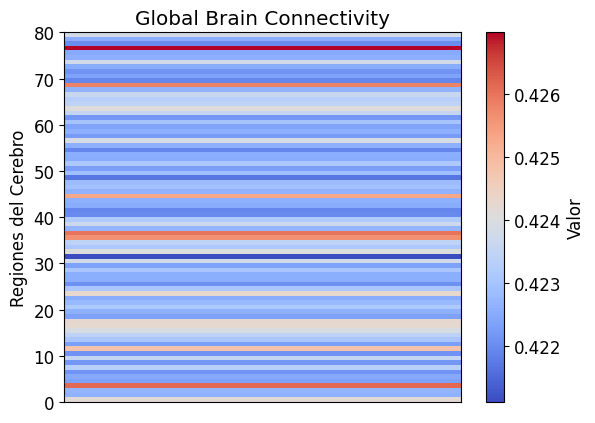

In [13]:
# Reformatear el vector a una matriz de una columna (25x1)
matriz = GBC_mt.reshape((80, 1))

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Mostrar la matriz como imagen
im = ax.imshow(matriz, cmap='coolwarm', aspect='auto', extent=[0, 1, 0, 80])

# Añadir una barra de color
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Valor')

# Ajustar las etiquetas del eje x
ax.set_xticks([])  # Desactivar las etiquetas del eje x

# Añadir etiquetas y título
plt.ylabel('Regiones del Cerebro')
plt.title('Global Brain Connectivity')

# Mostrar la visualización
plt.show()

# Resultados

## Figura Large-scale network

### Deco

Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the FIC mechanism in DecoEtAl2014...
=    simulating E-E (no FIC)         =
Processing: 0.0

D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\EulerMaruyama.py:36: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)


 => 3.087136429316694
Processing: 0.1 => 3.387007537344327
Processing: 0.2 => 3.751396410591771
Processing: 0.30000000000000004 => 4.202159572360892
Processing: 0.4 => 4.758716536345283
Processing: 0.5 => 5.475540826382178
Processing: 0.6000000000000001 => 6.376684347867399
Processing: 0.7000000000000001 => 7.513579980257051
Processing: 0.8 => 8.955055321604801
Processing: 0.9 => 10.69809657928425
Processing: 1.0 => 12.73549668095237
Processing: 1.1 => 15.035814635741572
Processing: 1.2000000000000002 => 17.50846343994866
Processing: 1.3 => 20.140484056490823
Processing: 1.4000000000000001 => 22.850005946252356
Processing: 1.5 => 25.61427482805752
Processing: 1.6 => 28.40036448938672
Processing: 1.7000000000000002 => 31.187140922342298
Processing: 1.8 => 33.98317936926676
Processing: 1.9000000000000001 => 36.7561806662485
Processing: 2.0 => 39.52167745906015
Processing: 2.1 => 42.283064674580494
Processing: 2.2 => 45.02832063704587
Processing: 2.3000000000000003 => 47.77372379245125
Pr


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000027564DA1800> (for post_execute):


KeyboardInterrupt: 

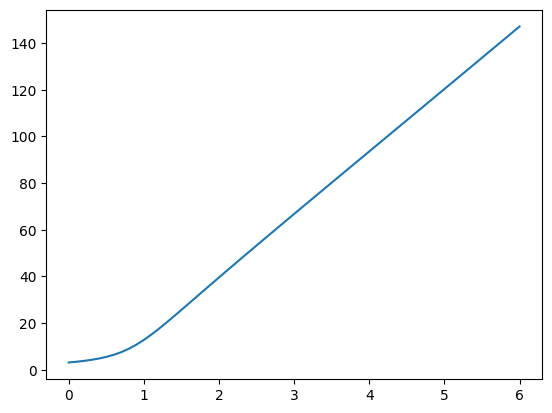

In [1]:
import Tests.fig_Deco as fig_Deco

# Carpeta destino
folder_path = 'Datos/Results/Results_Deco'

# Calculo DMF
fig_Deco.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), wStep=0.1, wEnd= 6 + 0.001)

### Herzog

In [ ]:
import Tests.fig_Herzog as fig_Herzog

# Carpeta destino
folder_path = 'Datos/Results/Results_Herzog'

# Calculo DMF
fig_Herzog.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), wStep=0.2, wEnd= 6 + 0.001)

### Naskar

#### Datos Naskar

In [ ]:
import Tests.Fig_Naskar as fig_Naskar
import scipy.io as sio

# fig_Naskar.integrator.clamping = True
# fig_Naskar.integrator.clamping_max = 2

# Cargo SC
SC = sio.loadmat('Datos/Datasets/StructuralConnectivity/avgSC68.mat')

# Carpeta destino
folder_path = 'Datos/Results/Results_test2'

# Calculo DMF
fig_Naskar.plotMaxFrecForAllWe(SC['avgSC40'], fileName=os.path.join(folder_path, 'results_{}.txt'), wEnd=1.5, wStep=0.2)

#### Nuevos datos (80x80)

##### DecoEtAl_2014

Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Euler integraation scheme...
=    simulating Naskar               =

Processing: 0.0  

D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\Euler.py:30: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)


maxRateFIC => 3.008759407833943

Processing: 0.2  maxRateFIC => 3.0087590753355054

Processing: 0.4  maxRateFIC => 3.0091590157289168

Processing: 0.6000000000000001  maxRateFIC => 3.0145647322871816

Processing: 0.8  maxRateFIC => 3.0087577817020774

Processing: 1.0  maxRateFIC => 3.0088018140835104

Processing: 1.2000000000000002  maxRateFIC => 3.0088948248032463

Processing: 1.4000000000000001  maxRateFIC => 3.0087840802342267

Processing: 1.6  maxRateFIC => 3.0087923506909195

Processing: 1.8  maxRateFIC => 3.0088332423210082

Processing: 2.0  maxRateFIC => 3.009813806028312

Processing: 2.2  maxRateFIC => 3.0088475885302928

Processing: 2.4000000000000004  maxRateFIC => 3.0088595065826653

Processing: 2.6  maxRateFIC => 3.009051713724801

Processing: 2.8000000000000003  maxRateFIC => 3.0089283116261925

Processing: 3.0  maxRateFIC => 3.0088336679435232

Processing: 3.2  maxRateFIC => 3.0088464025610433

Processing: 3.4000000000000004  maxRateFIC => 3.0113795996114288

Processing: 

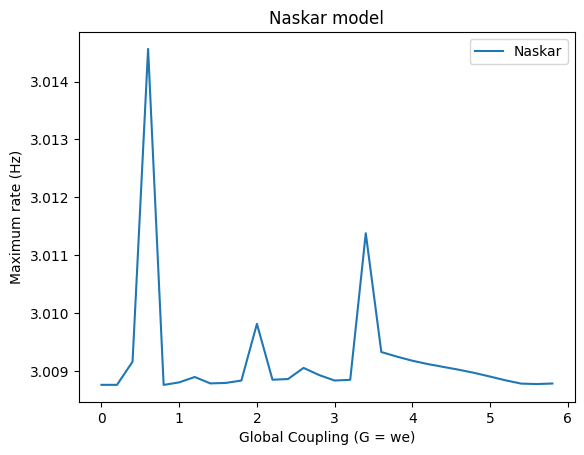

In [4]:
import Tests.Fig_Naskar as fig_Naskar
import scipy.io as sio

inFilePath = 'Datos/Datasets/DataHCP80/'
outFilePath = 'Datos/Results/Results_80x80/'

SC_path = inFilePath + 'SC_dbs80HARDIFULL.mat'
sc80 = sio.loadmat(SC_path)['SC_dbs80FULL']
C = sc80/np.max(sc80)  # Normalization...

fig_Naskar.plotMaxFrecForAllWe(C, fileName=os.path.join(outFilePath , 'results_{}.txt'), wEnd=6, wStep=0.2)    

##### NaskarEtAl_2018

Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Euler integraation scheme...
=    simulating Naskar               =

Processing: 0.0  

D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\Euler.py:30: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)


maxRateFIC => 3.161333469496898

Processing: 0.2  maxRateFIC => 3.0945247769440276

Processing: 0.4  maxRateFIC => 3.072453409556735

Processing: 0.6000000000000001  maxRateFIC => 3.1256443713821236

Processing: 0.8  maxRateFIC => 12.373060708261026

Processing: 1.0  maxRateFIC => 19.592761277742767

Processing: 1.2000000000000002  maxRateFIC => 24.96205176862937

Processing: 1.4000000000000001  maxRateFIC => 30.40715990878755


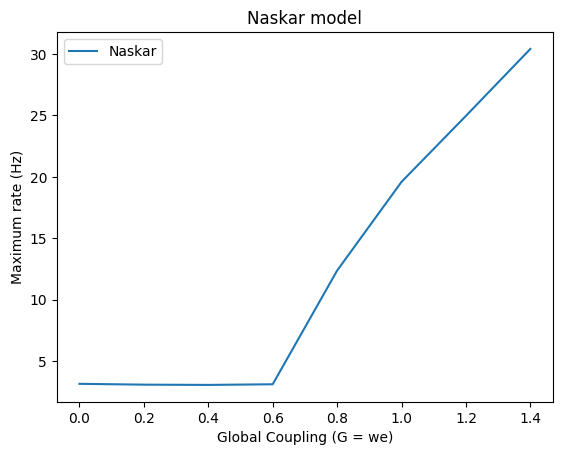

In [3]:
import Tests.Fig_Naskar as fig_Naskar
import scipy.io as sio

inFilePath = 'Datos/Datasets/DataHCP80/'
outFilePath = 'Datos/Results/Results_80x80/'

SC_path = inFilePath + 'SC_dbs80HARDIFULL.mat'
sc80 = sio.loadmat(SC_path)['SC_dbs80FULL']
C = sc80/np.max(sc80)  # Normalization...

fig_Naskar.plotMaxFrecForAllWe(C, fileName=os.path.join(outFilePath , 'results_{}.txt'), wEnd=1.4+0.001, wStep=0.1)    

### Naskar - Deco - Herzog

Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Euler integraation scheme...
Going to use the FIC mechanism in DecoEtAl2014...
Going to use the Balanced J (FIC) mechanism in HerzogEtAl2022...
=    simulating Naskar               =

Processing: 0.1  

D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\Euler.py:30: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)


maxRateFIC => 3.0087593855072203

Processing: 0.2  maxRateFIC => 3.0087593631386027

Processing: 0.30000000000000004  maxRateFIC => 3.008759340798513

Processing: 0.4  maxRateFIC => 3.008759318547591

Processing: 0.5  maxRateFIC => 3.008759296437337

Processing: 0.6  maxRateFIC => 3.0087592745131815

Processing: 0.7000000000000001  maxRateFIC => 3.0087592528137086

Processing: 0.8  maxRateFIC => 3.0087592324313577

Processing: 0.9  maxRateFIC => 3.008759213357367

Processing: 1.0  maxRateFIC => 3.0087591952215593

Processing: 1.1  maxRateFIC => 3.008759178082822

Processing: 1.2000000000000002  maxRateFIC => 3.008759161992409

Processing: 1.3000000000000003  maxRateFIC => 3.008759146995465

Processing: 1.4000000000000001  maxRateFIC => 3.0087591331310812

Processing: 1.5000000000000002  maxRateFIC => 3.008759120433411

Processing: 1.6  maxRateFIC => 3.0087591089322396

Processing: 1.7000000000000002  maxRateFIC => 3.008759098652269

Processing: 1.8000000000000003  maxRateFIC => 3.00875

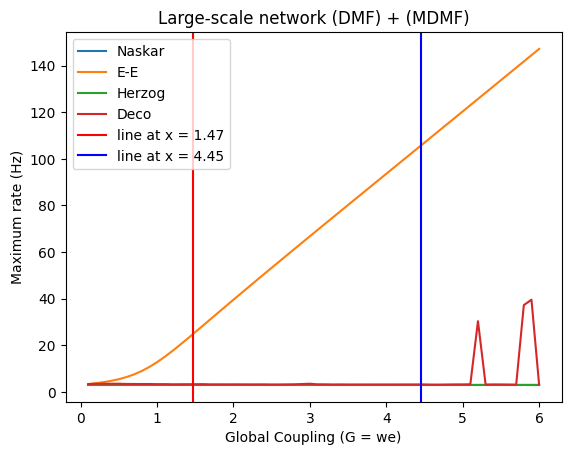

In [2]:
import Tests.fig_NDH as fig_NDH

# Carpeta destino
folder_path_h = 'Datos/Results/Results_Herzog'
folder_path_d = 'Datos/Results/Results_Deco'

# Calculo DMF
fig_NDH.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName_H=os.path.join(folder_path_h, 'results_{}.txt'), fileName_D=os.path.join(folder_path_d, 'results_{}.txt'), wStep= 0.1, wEnd = 6+0.001)

plt.show()

## Optimizacion de variables

### G optimo

In [ ]:
import Tests.Deco2018.prepro as prepro
#import WholeBrain.Utils.FIC.Balance_Herzog2022 as Balance_Herzog2022
#import WholeBrain.Utils.FIC.Balance_DecoEtAl2014 as Balance_DecoEtAl2014
#import WholeBrain.Models.DynamicMeanField as DMF
import WholeBrain.Models.Naskar as Naskar

outFilePath = 'Datos/Results/Results_Naskar/'
inFilePath = 'Datos/Datasets/DataHCP80/'

J_fileNames = outFilePath + "results_{}.txt"
prepro.prepro_Optim(neuronalModel= Naskar, M_e_optim= 1, M_i_optim= 1, J_fileNames= J_fileNames, Step= 0.1, End=5.5, Start=0)

----------- Processing: EMOTION --------------
Loading Datos/Datasets/DataHCP80/hcp1003_EMOTION_LR_dbs80.mat
reading subject 0
reading subject 1
reading subject 2
reading subject 3
reading subject 4
reading subject 5
reading subject 6
reading subject 7
reading subject 8
reading subject 9
reading subject 10
reading subject 11
reading subject 12
reading subject 13
reading subject 14
reading subject 15
reading subject 16
reading subject 17
reading subject 18
reading subject 19
reading subject 20
reading subject 21
reading subject 22
reading subject 23
reading subject 24
reading subject 25
reading subject 26
reading subject 27
reading subject 28
reading subject 29
reading subject 30
reading subject 31
reading subject 32
reading subject 33
reading subject 34
reading subject 35
reading subject 36
reading subject 37
reading subject 38
reading subject 39
reading subject 40
reading subject 41
reading subject 42
reading subject 43
reading subject 44
reading subject 45
reading subject 46
reading 

In [ ]:
import Tests.Deco2018.plot as fig_optim
fig_optim.plot_optim('Datos/Results/Results_80x80/DecoEtAl2018_fneuro.mat', x= 'G')

### M_e Optimo

In [ ]:
import Tests.Deco2018.prepro as prepro
#import WholeBrain.Utils.FIC.Balance_Herzog2022 as Balance_Herzog2022
#import WholeBrain.Utils.FIC.Balance_DecoEtAl2014 as Balance_DecoEtAl2014
#import WholeBrain.Models.DynamicMeanField as DMF
import WholeBrain.Models.Naskar as Naskar

outFilePath = 'Datos/Results/Results_test/'
inFilePath = 'Datos/Datasets'
prepro.scale = 1
prepro.outFilePath = outFilePath 
prepro.inFilePath = inFilePath
#prepro.BalanceFIC.balancingMechanism = Balance_Herzog2022 


J_fileNames = outFilePath + "results_{}.txt"
prepro.prepro_Optim(neuronalModel= Naskar, selectedTask= 'GAMBLING', G_optim=6, J_fileNames=J_fileNames)

In [ ]:
import Tests.Deco2018.plot as fig_optim
fig_optim.plot_optim('Datos/Results/Results_Test/DecoEtAl2018_fneuro.mat', x= 'M_e')

### Guardar vector de J

In [2]:
prepro.save_J(M_e_optim=1, G_optim=6)

Going to use the Dynamic Mean Field (DMF) neuronal model...
Loading Datos/Datasets/StructuralConnectivity/netmats2_25.txt
Loading Datos/Datasets/fMRI/...
matriz_tridimensional is (25, 1200) and each entry has N=25 regions and Tmax=4800
Simulating 1 subjects!


Recompiling signatures!!!
Saving J...


D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\EulerMaruyama.py:36: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)


DONE!!! (file: Datos/Results/Results_test/J_Optim.mat)
